# Graph

## Import library/package yang dibutuhkan

In [ ]:
import pandas as pd
import re

## Load data

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/dennywr/cobaprosaindata/main/news_media_indonesia_politik_dan_hukum.csv')

In [ ]:
df = pd.DataFrame(data)
df

,Unnamed: 0,Judul,Isi
0,0,Formappi: Kinerja DPR Memburuk Jelang Pemilu,"None ""Kinerja buruk dalam fungsi legislasi DP..."
1,1,"Diduga Kuat Langgar Kode Etik, MAKI Minta Dewa...","None ""Kalau berdasarkan kode etik ya menurut ..."
2,2,"Jokowi Makan Siang Bersama 3 Capres, Pengamat ...","None Menanggapi itu, pengamat politik dari Un..."
3,3,Prabowo-Gibran Disebut Pasangan Ideal untuk Me...,None None “Pak Prabowo sebagai senior dan pah...
4,4,Koalisi Indonesia Maju Pilih Gibran untuk Beri...,SEKJEN PDI Perjuangan Hasto Kristiyanto menye...
5,5,Program BLT El Nino Dinilai Telat dan Bisa Tim...,None Dekan Fakultas Ekonomi dan Bisnis (FEB) ...
6,6,Politisi PDIP: Gibran Bukan Contoh Bagus untuk...,"None ""Mas Gibran sosok contoh tidak bagus unt..."
7,7,Gibran Rakabuming Raka Dinilai tidak Tegak Lur...,"None None None None “Tidak ada loyalitas, tid..."
8,8,"KPU Digugat Rp70,5 Triliun Efek Terima Gibran ...","None Dalam gugatannya, KPU RI dituntut untuk ..."
9,9,Ganjar Klaim tak Ada Pembahasan Gibran Saat Ma...,"None ""Tidak, tidak, tidak (ada pembahasan soa..."


In [ ]:
df['Isi'] = df['Isi'].fillna('').astype(str)

## Preprocessing

- Hapus karakter spesial pada teks

In [ ]:
def removeSpecialText (text):
  text = text.replace('\\t',"").replace('\\n',"").replace('\\u',"").replace('\\',"").replace('None',"")
  text = text.encode('ascii', 'replace').decode('ascii')
  return text.replace("http://"," ").replace("https://", " ")
df['Isi'] = df['Isi'].apply(removeSpecialText)
print(df['Isi'])

0       "Kinerja buruk dalam fungsi legislasi DPR ta...
1       "Kalau berdasarkan kode etik ya menurut saya...
2       Menanggapi itu, pengamat politik dari Univer...
3        ?Pak Prabowo sebagai senior dan paham di bi...
4      SEKJEN PDI Perjuangan Hasto Kristiyanto menye...
5       Dekan Fakultas Ekonomi dan Bisnis (FEB) Univ...
6       "Mas Gibran sosok contoh tidak bagus untuk a...
7          ?Tidak ada loyalitas, tidak ada disiplin,...
8       Dalam gugatannya, KPU RI dituntut untuk memb...
9       "Tidak, tidak, tidak (ada pembahasan soal Gi...
10      "Saya pikir bagus itu apapun juga fungsi per...
11      "Kita percaya, memang harus percaya. Paling ...
12      Kepala Pusat Penerangan (Kapuspen) TNI Laksd...
13     CALON Presiden (Capres) dari Koalisi Perubaha...
14      Pada kunjungan ini delegasi BKSAP DPR RI mel...
15      "Kami tadi sampaikan kepada beliau kami seri...
16      "Saya berharap makan siang hari ini, adalah ...
17       Presiden mengatakan pemda yang tidak ne

- Hapus tanda baca pada teks

In [ ]:
def removePunctuation(text):
  text = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text)
  return text

df['Isi'] = df['Isi'].apply(removePunctuation)
df['Isi'].head(20)

0        Kinerja buruk dalam fungsi legislasi DPR ta...
1        Kalau berdasarkan kode etik ya menurut saya...
2       Menanggapi itu  pengamat politik dari Univer...
3         Pak Prabowo sebagai senior dan paham di bi...
4      SEKJEN PDI Perjuangan Hasto Kristiyanto menye...
5       Dekan Fakultas Ekonomi dan Bisnis  FEB  Univ...
6        Mas Gibran sosok contoh tidak bagus untuk a...
7           Tidak ada loyalitas  tidak ada disiplin ...
8       Dalam gugatannya  KPU RI dituntut untuk memb...
9        Tidak  tidak  tidak  ada pembahasan soal Gi...
10       Saya pikir bagus itu apapun juga fungsi per...
11       Kita percaya  memang harus percaya  Paling ...
12      Kepala Pusat Penerangan  Kapuspen  TNI Laksd...
13     CALON Presiden  Capres  dari Koalisi Perubaha...
14      Pada kunjungan ini delegasi BKSAP DPR RI mel...
15       Kami tadi sampaikan kepada beliau kami seri...
16       Saya berharap makan siang hari ini  adalah ...
17       Presiden mengatakan pemda yang tidak ne

- Hapus angka pada teks

In [ ]:
def removeNumbers (text):
  return re.sub(r"\d+", "", text)
df['Isi'] = df['Isi'].apply(removeNumbers)
df['Isi']

0        Kinerja buruk dalam fungsi legislasi DPR ta...
1        Kalau berdasarkan kode etik ya menurut saya...
2       Menanggapi itu  pengamat politik dari Univer...
3         Pak Prabowo sebagai senior dan paham di bi...
4      SEKJEN PDI Perjuangan Hasto Kristiyanto menye...
5       Dekan Fakultas Ekonomi dan Bisnis  FEB  Univ...
6        Mas Gibran sosok contoh tidak bagus untuk a...
7           Tidak ada loyalitas  tidak ada disiplin ...
8       Dalam gugatannya  KPU RI dituntut untuk memb...
9        Tidak  tidak  tidak  ada pembahasan soal Gi...
10       Saya pikir bagus itu apapun juga fungsi per...
11       Kita percaya  memang harus percaya  Paling ...
12      Kepala Pusat Penerangan  Kapuspen  TNI Laksd...
13     CALON Presiden  Capres  dari Koalisi Perubaha...
14      Pada kunjungan ini delegasi BKSAP DPR RI mel...
15       Kami tadi sampaikan kepada beliau kami seri...
16       Saya berharap makan siang hari ini  adalah ...
17       Presiden mengatakan pemda yang tidak ne

- Ubah semua huruf pada teks menjadi huruf kecil

In [ ]:
def casefolding(Comment):
  Comment = Comment.lower()
  return Comment
df['Isi'] = df['Isi'].apply(casefolding)
df['Isi']

0        kinerja buruk dalam fungsi legislasi dpr ta...
1        kalau berdasarkan kode etik ya menurut saya...
2       menanggapi itu  pengamat politik dari univer...
3         pak prabowo sebagai senior dan paham di bi...
4      sekjen pdi perjuangan hasto kristiyanto menye...
5       dekan fakultas ekonomi dan bisnis  feb  univ...
6        mas gibran sosok contoh tidak bagus untuk a...
7           tidak ada loyalitas  tidak ada disiplin ...
8       dalam gugatannya  kpu ri dituntut untuk memb...
9        tidak  tidak  tidak  ada pembahasan soal gi...
10       saya pikir bagus itu apapun juga fungsi per...
11       kita percaya  memang harus percaya  paling ...
12      kepala pusat penerangan  kapuspen  tni laksd...
13     calon presiden  capres  dari koalisi perubaha...
14      pada kunjungan ini delegasi bksap dpr ri mel...
15       kami tadi sampaikan kepada beliau kami seri...
16       saya berharap makan siang hari ini  adalah ...
17       presiden mengatakan pemda yang tidak ne

- Deteksi slank words (kata-kata yang tidak baku)

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# Membuat kamus slang words dan kata Indonesia yang benar
slang_dict = {"@": "di", "abis": "habis", "ad": "ada", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin","sdh":"sudah","pernh":"pernah","pnya":"punya", "syulitttt":"sulit", "jelass":"jelas","mu":"kamu", "and":"dan","pingin":"ingin", "kenerjanya":"kenerjanya","tmb":"tambah","dpat":"dapat","ttp":"tetap","lm":"lama", "majuterus":"maju terus","idonesia":"indonesia","menugumu":"menunggumu", "eloe":"kamu", "rja":"kerja", "so":"pasti","anes":"anies"}

In [ ]:
# Membuat fungsi untuk mengubah slang words menjadi kata Indonesia yang benar,
def replaceSlangWords(text):
    words = nltk.word_tokenize(text.lower())
    words_filtered = [word for word in words if word not in stopwords.words('indonesian')]
    for i in range(len(words_filtered)):
        if words_filtered[i] in slang_dict:
            words_filtered[i] = slang_dict[words_filtered[i]]
    return ' '.join(words_filtered)

# Memasukan Kata yang telah di clean ke dalam fungsi deteksi slang words
slang_words=[]
for i in range(len(df['Isi'])):
  slang = replaceSlangWords(df['Isi'][i])
  slang_words.append(slang)

data_slang = pd.DataFrame(slang_words, columns=["Slang Word Corection"])
data_slang

,Slang Word Corection
0,kinerja buruk fungsi legislasi dpr minimnya pr...
1,berdasarkan kode etik iya melanggar pimpinan k...
2,menanggapi pengamat politik universitas al azh...
3,prabowo senior paham bidang pertahanan mas gib...
4,sekjen pdi perjuangan hasto kristiyanto menyeb...
5,dekan fakultas ekonomi bisnis feb universitas ...
6,mas gibran sosok contoh bagus anak muda gibran...
7,loyalitas disiplin ikhlas djarot dialog politi...
8,gugatannya kpu ri dituntut membayar kerugian m...
9,pembahasan gibran ganjar istana kepresidenan j...


## TF-IDF

TF-IDF (Term Frequency-Inverse Document Frequency) adalah metode yang digunakan mengevaluasi seberapa penting sebuah kata bagi sebuah dokumen dalam kumpulan dokumen dengan cara mengalikan berapa kali sebuah kata muncul dalam sebuah dokumen (Term Frequency) dengan frekuensi dokumen terbalik (Inverse Document Frequency) dari kata di seluruh set dokumen.




In [ ]:
from nltk.tokenize import RegexpTokenizer
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords', quiet=True)

True

In [ ]:
finalResult = pd.DataFrame(slang_words, columns=["Slang Word Corection"])
# finalResult

In [ ]:
from nltk.tokenize import RegexpTokenizer
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

nltk.download('stopwords', quiet=True)

stopwords = stopwords.words('indonesian')

tokenizer = RegexpTokenizer(r'\w+')
vectorizer = TfidfVectorizer(lowercase=True,
                        stop_words=stopwords,
                        tokenizer = tokenizer.tokenize)


tfidf_matrix = vectorizer.fit_transform(finalResult["Slang Word Corection"])
tfidf_terms = vectorizer.get_feature_names_out()

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


In [ ]:
def sklearn_frequency_vectorize(corpus):
    # Scikit-Learn frequency vectorize method
    from sklearn.feature_extraction.text import CountVectorizer

    vectorizer = CountVectorizer()
    # mengembalikan frekuensi kemunculan
    return vectorizer.fit_transform(corpus)
vectsklen=sklearn_frequency_vectorize(finalResult["Slang Word Corection"])
print(vectsklen)

  (0, 397)	5
  (0, 108)	4
  (0, 240)	3
  (0, 456)	1
  (0, 210)	16
  (0, 598)	1
  (0, 773)	1
  (0, 942)	2
  (0, 951)	1
  (0, 165)	1
  (0, 357)	1
  (0, 557)	1
  (0, 37)	1
  (0, 775)	1
  (0, 772)	1
  (0, 887)	1
  (0, 359)	1
  (0, 707)	1
  (0, 60)	2
  (0, 678)	1
  (0, 239)	4
  (0, 17)	7
  (0, 780)	1
  (0, 418)	1
  (0, 718)	1
  :	:
  (19, 698)	1
  (19, 742)	1
  (19, 383)	1
  (19, 810)	2
  (19, 958)	1
  (19, 783)	1
  (19, 125)	1
  (19, 533)	1
  (19, 273)	2
  (19, 589)	1
  (19, 355)	1
  (19, 227)	1
  (19, 245)	1
  (19, 271)	1
  (19, 302)	1
  (19, 699)	1
  (19, 496)	1
  (19, 368)	1
  (19, 661)	1
  (19, 905)	1
  (19, 659)	1
  (19, 582)	1
  (19, 536)	1
  (19, 23)	1
  (19, 217)	1


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# Membuat objek CountVectorizer
coun_vect = CountVectorizer(stop_words=stopwords)
count_matrix = coun_vect.fit_transform(finalResult["Slang Word Corection"])
count_array = count_matrix.toarray()
# Membuat DataFrame dari array dengan kolom berdasarkan term dalam teks
df = pd.DataFrame(data=count_array,columns = coun_vect.vocabulary_.keys())
df

,kinerja,buruk,fungsi,legislasi,dpr,minimnya,produk,undang,uu,dihasilkan,...,perangnya,meluas,kenaikan,pemaparan,terkini,pemahaman,menyusun,mengantisipasi,aneka,dunia
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,1,0,2,...,0,0,0,0,0,0,0,0,0,0
6,2,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
# menampilkan bobot dari masing-masing term
vsc = pd.DataFrame(data=tfidf_matrix.toarray(),columns = vectorizer.vocabulary_.keys())
print("\nTF-IDF Vectorizer\n")
vsc


TF-IDF Vectorizer



,kinerja,buruk,fungsi,legislasi,dpr,minimnya,produk,undang,uu,dihasilkan,...,perangnya,meluas,kenaikan,pemaparan,terkini,pemahaman,menyusun,mengantisipasi,aneka,dunia
0,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009479,0.000000
1,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025747,0.000000
2,0.00000,0.000000,0.099362,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.072195,0.031095,0.000000
3,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076935,0.000000,0.024076,0.000000
4,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.052363,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016387,0.000000
5,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.067881,0.000000,0.135762,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.021243,0.000000
6,0.13384,0.000000,0.000000,0.000000,0.000000,0.06692,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020942,0.000000
7,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.121608,0.052376,0.000000
8,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030409,0.013097,0.000000
9,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.133719,0.000000,0.000000,0.000000,0.041847,0.000000


In [ ]:
print(tfidf_matrix)

  (0, 975)	0.009478817758927347
  (0, 593)	0.022007950905108556
  (0, 418)	0.01776012431418806
  (0, 425)	0.022007950905108556
  (0, 301)	0.030289257460369264
  (0, 611)	0.030289257460369264
  (0, 964)	0.026624720931840023
  (0, 814)	0.02036015435874942
  (0, 546)	0.026624720931840023
  (0, 795)	0.026624720931840023
  (0, 349)	0.026624720931840023
  (0, 630)	0.030289257460369264
  (0, 396)	0.030289257460369264
  (0, 827)	0.030289257460369264
  (0, 238)	0.06057851492073853
  (0, 383)	0.053249441863680046
  (0, 645)	0.05328037294256417
  (0, 224)	0.06057851492073853
  (0, 742)	0.053249441863680046
  (0, 948)	0.030289257460369264
  (0, 751)	0.030289257460369264
  (0, 490)	0.026624720931840023
  (0, 109)	0.030289257460369264
  (0, 581)	0.030289257460369264
  (0, 790)	0.030289257460369264
  :	:
  (19, 976)	0.19460629691650602
  (19, 962)	0.09730314845825301
  (19, 942)	0.19460629691650602
  (19, 521)	0.09730314845825301
  (19, 601)	0.0855309568707665
  (19, 745)	0.0855309568707665
  (19, 55

## Cosinus Similarity

Cosine similarity adalah ukuran statistik yang digunakan untuk menentukan seberapa mirip dua vektor. Cosine similarity sering digunakan untuk mengukur seberapa mirip dua atau lebih dokumen. Berikut merupakan rumus untuk menghitung cosine similarity:


$\text{cosine similarity}(A, B) = \frac{A \cdot B}{||A||_2 \times ||B||_2} = \frac{\sum_{i=1}^{n} A_i \times B_i}{\sqrt{\sum_{i=1}^{n} (A_i)^2} \times \sqrt{\sum_{i=1}^{n} (B_i)^2}}$



Dimana:


- A dan B adalah dua vektor yang ingin Anda hitung cosine similarity-nya

- A⋅B adalah dot product dari dua vektor

- ∣∣A∣∣2​ dan ∣∣B∣∣2​ adalah norm (atau panjang) dari masing-masing vektor

In [ ]:
import numpy as np

def cosine_similarity(matrix):
    # Normalisasi vektor
    norm = np.linalg.norm(matrix, axis=1, keepdims=True)
    matrix_norm = matrix / norm

    # Hitung cosine similarity
    calculate_cosine_similarity = np.dot(matrix_norm, matrix_norm.T)

    return calculate_cosine_similarity

# hitung cosine similarity
cosine_similarity_result = cosine_similarity(tfidf_matrix.toarray())
# menghasilkan matriks cosine similarity, di mana setiap elemen i, j mewakili cosine similarity antara dokumen i dan j
cosine_similarity_df = pd.DataFrame(cosine_similarity_result)

# Menampilkan DataFrame
cosine_similarity_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.000000,0.009587,0.015086,0.004187,0.049200,0.004086,0.027146,0.028899,0.027479,0.005334,0.022615,0.011796,0.032979,0.011406,0.087232,0.019611,0.014708,0.029634,0.044463,0.003579
1,0.009587,1.000000,0.042820,0.006800,0.006583,0.001756,0.009378,0.003147,0.005517,0.029956,0.034135,0.010893,0.017639,0.029358,0.023247,0.003858,0.010949,0.016242,0.020813,0.005010
2,0.015086,0.042820,1.000000,0.023550,0.049577,0.008793,0.063519,0.051760,0.034387,0.108905,0.207919,0.155205,0.043005,0.192332,0.046078,0.168434,0.176748,0.058921,0.030412,0.039443
3,0.004187,0.006800,0.023550,1.000000,0.113601,0.016580,0.074963,0.033521,0.078373,0.027110,0.047226,0.030354,0.031500,0.025029,0.055775,0.031385,0.051317,0.004183,0.061499,0.036180
4,0.049200,0.006583,0.049577,0.113601,1.000000,0.007203,0.083544,0.053656,0.112100,0.057089,0.088462,0.062849,0.065284,0.067166,0.053682,0.042766,0.072910,0.034918,0.283459,0.021970
5,0.004086,0.001756,0.008793,0.016580,0.007203,1.000000,0.004287,0.005019,0.000893,0.000889,0.001828,0.028152,0.001474,0.012414,0.010728,0.000868,0.004740,0.008571,0.006413,0.022078
6,0.027146,0.009378,0.063519,0.074963,0.083544,0.004287,1.000000,0.220017,0.054252,0.036283,0.026426,0.028082,0.081947,0.024837,0.019234,0.035810,0.043632,0.023081,0.111184,0.005996
7,0.028899,0.003147,0.051760,0.033521,0.053656,0.005019,0.220017,1.000000,0.009850,0.108851,0.053946,0.033020,0.090477,0.026164,0.004779,0.050716,0.043911,0.009280,0.111337,0.007194
8,0.027479,0.005517,0.034387,0.078373,0.112100,0.000893,0.054252,0.009850,1.000000,0.039260,0.082097,0.136996,0.013012,0.157189,0.056804,0.049802,0.086851,0.088759,0.066456,0.027243
9,0.005334,0.029956,0.108905,0.027110,0.057089,0.000889,0.036283,0.108851,0.039260,1.000000,0.121140,0.172102,0.009087,0.087841,0.012737,0.074890,0.080262,0.017780,0.027858,0.033385


## Graph (NetworkX)

Graph adalah jenis struktur data umum yang susunan datanya tidak berdekatan satu sama lain (non-linier). Graph terdiri dari kumpulan simpul berhingga untuk menyimpan data dan antara dua buah simpul terdapat hubungan saling keterkaitan. Simpul pada graph disebut dengan verteks (V), sedangkan sisi yang menghubungkan antar verteks disebut edge (E). Graf digunakan untuk merepresentasikan objek-objek diskrit dan hubungan antara objek-objek tersebut. Dalam bahasa sehari-hari, sebuah graf adalah himpunan dari objek-objek yang dinamakan titik, simpul, atau sudut dihubungkan oleh penghubung yang dinamakan garis atau sisi.

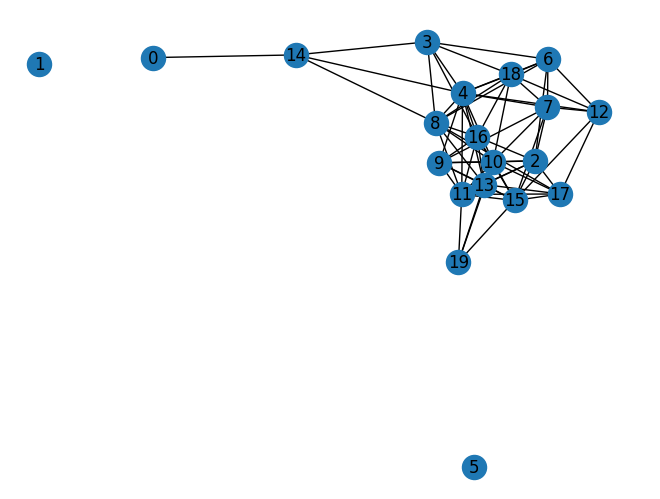

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Membuat grafik kosong
G = nx.Graph()

# Menambahkan node ke dalam grafik
for i in range(cosine_similarity_result.shape[0]):
    G.add_node(i)

# Menambahkan edge berdasarkan cosine similarity
for i in range(cosine_similarity_result.shape[0]):
    for j in range(i+1, cosine_similarity_result.shape[1]):
        # tambahkan threshold jika perlu
        if cosine_similarity_result[i, j] > 0.05:
            G.add_edge(i, j, weight=cosine_similarity_result[i, j])

# Menggambar grafik
nx.draw(G, with_labels=True)
plt.show()


## Closeness Centrality

Closeness Centrality adalah ukuran sentralitas dalam jaringan, dihitung sebagai balikan dari jumlah panjang jalur terpendek antara simpul dan semua simpul lainnya dalam grafik. Dengan kata lain, semakin sentral sebuah simpul, semakin dekat ia dengan semua simpul lainnya. Closeness Centrality digunakan untuk mendeteksi simpul yang mampu menyebarkan informasi dengan sangat efisien melalui grafik. Berikut merupakan rumus untuk menghitung closeness centrality:


$C(u) = \frac{1}{\sum_{v=1}^{n} d(u, v)}$


Dimana:

- $C(u)$ adalah closeness centrality dari node $u$


- $d(u,v)$  adalah jarak terpendek antara node $u$ dan $v$

In [ ]:
# Menghitung closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Mencetak hasil
for node, closeness in closeness_centrality.items():
    print(f"Node {node}: Closeness Centrality = {closeness}")

Node 0: Closeness Centrality = 0.3104189044038668
Node 1: Closeness Centrality = 0.0
Node 2: Closeness Centrality = 0.5432330827067668
Node 3: Closeness Centrality = 0.5245009074410163
Node 4: Closeness Centrality = 0.6913875598086124
Node 5: Closeness Centrality = 0.0
Node 6: Closeness Centrality = 0.5245009074410163
Node 7: Closeness Centrality = 0.5633528265107213
Node 8: Closeness Centrality = 0.6337719298245614
Node 9: Closeness Centrality = 0.5633528265107213
Node 10: Closeness Centrality = 0.6613272311212814
Node 11: Closeness Centrality = 0.608421052631579
Node 12: Closeness Centrality = 0.5245009074410163
Node 13: Closeness Centrality = 0.608421052631579
Node 14: Closeness Centrality = 0.4609250398724083
Node 15: Closeness Centrality = 0.5633528265107213
Node 16: Closeness Centrality = 0.608421052631579
Node 17: Closeness Centrality = 0.5432330827067668
Node 18: Closeness Centrality = 0.5633528265107213
Node 19: Closeness Centrality = 0.4345864661654135


### Nilai closeness centrality dari yang tertinggi ke terendah

In [ ]:
# Mengurutkan node berdasarkan closeness centrality
sorted_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)

# Mencetak hasil
for node, closeness in sorted_closeness:
    print(f"Node {node}: Closeness Centrality = {closeness}")

Node 4: Closeness Centrality = 0.6913875598086124
Node 10: Closeness Centrality = 0.6613272311212814
Node 8: Closeness Centrality = 0.6337719298245614
Node 11: Closeness Centrality = 0.608421052631579
Node 13: Closeness Centrality = 0.608421052631579
Node 16: Closeness Centrality = 0.608421052631579
Node 7: Closeness Centrality = 0.5633528265107213
Node 9: Closeness Centrality = 0.5633528265107213
Node 15: Closeness Centrality = 0.5633528265107213
Node 18: Closeness Centrality = 0.5633528265107213
Node 2: Closeness Centrality = 0.5432330827067668
Node 17: Closeness Centrality = 0.5432330827067668
Node 3: Closeness Centrality = 0.5245009074410163
Node 6: Closeness Centrality = 0.5245009074410163
Node 12: Closeness Centrality = 0.5245009074410163
Node 14: Closeness Centrality = 0.4609250398724083
Node 19: Closeness Centrality = 0.4345864661654135
Node 0: Closeness Centrality = 0.3104189044038668
Node 1: Closeness Centrality = 0.0
Node 5: Closeness Centrality = 0.0


### 3 nilai closeness centrality teratas

In [ ]:
# Mengambil 3 node dengan closeness centrality tertinggi
top_3_nodes = sorted_closeness[:3]

# Membuat DataFrame
df = pd.DataFrame(top_3_nodes, columns=['Node', 'Closeness Centrality'])

# Menambahkan isi dari setiap node ke DataFrame
df['Kalimat'] = [finalResult.loc[node, 'Slang Word Corection'] for node, _ in top_3_nodes]
# Mengganti indeks DataFrame dengan node
df.set_index('Node', inplace=True)
# Menampilkan DataFrame
df

,Closeness Centrality,Kalimat
Node,,
4,0.691388,sekjen pdi perjuangan hasto kristiyanto menyeb...
10,0.661327,pikir bagus apapun fungsi peran presiden kepal...
8,0.633772,gugatannya kpu ri dituntut membayar kerugian m...


## Pagerank

PageRank bekerja dengan cara menghitung jumlah dan kualitas tautan yang masuk ke suatu simpul. Jika sebuah simpul memiliki banyak tautan yang masuk dari simpul lain yang penting, maka simpul tersebut akan dianggap penting. Berikut merupakan rumus untuk menghitung pagerank:


$PR(A) = (1-d) + d \left( \frac{PR(T1)}{C(T1)} + \frac{PR(T2)}{C(T2)} + ... + \frac{PR(Tn)}{C(Tn)} \right)$


Dimana:


- $PR(A)$ adalah PageRank dari halaman $A$.

- $PR(T1)$ sampai $PR(Tn)$ adalah PageRank dari halaman $T1$ sampai $Tn$ yang mengarah ke halaman $A$ (yaitu halaman yang memiliki tautan ke $A$).

- $C(T1)$ sampai $C(Tn)$ adalah jumlah tautan keluar dari halaman $T1$ sampai $Tn$.

- $d$ adalah faktor damping, yang biasanya diatur ke 0.85.

In [ ]:
# Menghitung PageRank
pagerank = nx.pagerank(G, alpha=0.85)

for node, rank in pagerank.items():
    print(f"Node {node}: PageRank = {rank}")

Node 0: PageRank = 0.017811113262076045
Node 1: PageRank = 0.008196721311475412
Node 2: PageRank = 0.06148000617281217
Node 3: PageRank = 0.03427125895643202
Node 4: PageRank = 0.06929908705485523
Node 5: PageRank = 0.008196721311475412
Node 6: PageRank = 0.04558866554552417
Node 7: PageRank = 0.046448932726335254
Node 8: PageRank = 0.05642423633743818
Node 9: PageRank = 0.04488947230138557
Node 10: PageRank = 0.07513606735511807
Node 11: PageRank = 0.10229122499165873
Node 12: PageRank = 0.03500512454816922
Node 13: PageRank = 0.10036871474259453
Node 14: PageRank = 0.032867810435380854
Node 15: PageRank = 0.08462701742607408
Node 16: PageRank = 0.059994255796619565
Node 17: PageRank = 0.039083472269416
Node 18: PageRank = 0.057190141023370084
Node 19: PageRank = 0.02082995643178941


### Nilai pagerank dari tertinggi ke terendah

In [ ]:
# Mengurutkan PageRank dari yang tertinggi ke terendah
sorted_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)

# Mencetak hasil
for node, rank in sorted_pagerank:
    print(f"Node {node}: PageRank = {rank}")

Node 11: PageRank = 0.10229122499165873
Node 13: PageRank = 0.10036871474259453
Node 15: PageRank = 0.08462701742607408
Node 10: PageRank = 0.07513606735511807
Node 4: PageRank = 0.06929908705485523
Node 2: PageRank = 0.06148000617281217
Node 16: PageRank = 0.059994255796619565
Node 18: PageRank = 0.057190141023370084
Node 8: PageRank = 0.05642423633743818
Node 7: PageRank = 0.046448932726335254
Node 6: PageRank = 0.04558866554552417
Node 9: PageRank = 0.04488947230138557
Node 17: PageRank = 0.039083472269416
Node 12: PageRank = 0.03500512454816922
Node 3: PageRank = 0.03427125895643202
Node 14: PageRank = 0.032867810435380854
Node 19: PageRank = 0.02082995643178941
Node 0: PageRank = 0.017811113262076045
Node 1: PageRank = 0.008196721311475412
Node 5: PageRank = 0.008196721311475412


### 3 nilai pagerank teratas

In [ ]:
# Mengambil 3 nilai teratas
top_3_pagerank = sorted_pagerank[:3]
df = pd.DataFrame(top_3_pagerank, columns=['Node', 'Pagerank'])

# Menambahkan isi dari setiap node ke DataFrame
df['Kalimat'] = [finalResult.loc[node, 'Slang Word Corection'] for node, _ in top_3_pagerank]
# Mengganti indeks DataFrame dengan node
df.set_index('Node', inplace=True)
# Menampilkan DataFrame
df

,Pagerank,Kalimat
Node,,
11,0.102291,percaya percaya pesan beliau merespons positif...
13,0.100369,calon presiden capres koalisi perubahan anies ...
15,0.084627,beliau bertemu orang sayang presiden sayang me...


## Eignvector Centrality

Eigenvector Centrality adalah ukuran sentralitas dalam teori graf, yang memberikan skor relatif kepada semua simpul dalam jaringan berdasarkan konsep bahwa koneksi ke simpul dengan skor tinggi berkontribusi lebih banyak terhadap skor simpul yang dipertanyakan daripada koneksi yang sama ke simpul dengan skor rendah. Dengan kata lain, simpul dengan Eigenvector Centrality yang tinggi berarti bahwa simpul tersebut terhubung ke banyak simpul yang juga memiliki skor tinggi. Berikut merupakan rumus untuk menghitung nilai eignvector centrality:


$x_v = \frac{1}{\lambda} \sum_{t \in M(v)} x_t$

Dimana:

- $x_v$ adalah eigenvector centrality dari simpul $v$.

- $M(v)$ adalah set simpul yang berdekatan dengan $v$

- $x_t$​ adalah eigenvector centrality dari simpul $t$.

- λ adalah konstanta.

In [ ]:
# Menghitung eigenvector centrality
eigenvector_centrality = nx.eigenvector_centrality(G)

# Mencetak hasil
for node, centrality in eigenvector_centrality.items():
    print(f"Node {node}: Eigenvector Centrality = {centrality}")

Node 0: Eigenvector Centrality = 0.009113114208443905
Node 1: Eigenvector Centrality = 2.69961162219537e-16
Node 2: Eigenvector Centrality = 0.26504867922361197
Node 3: Eigenvector Centrality = 0.1498141286255794
Node 4: Eigenvector Centrality = 0.307364193113173
Node 5: Eigenvector Centrality = 2.69961162219537e-16
Node 6: Eigenvector Centrality = 0.17649296864676517
Node 7: Eigenvector Centrality = 0.2225903632847267
Node 8: Eigenvector Centrality = 0.2646585281940441
Node 9: Eigenvector Centrality = 0.25693646391388114
Node 10: Eigenvector Centrality = 0.3398139510710536
Node 11: Eigenvector Centrality = 0.29597152153491874
Node 12: Eigenvector Centrality = 0.15728693808689612
Node 13: Eigenvector Centrality = 0.29597152153491874
Node 14: Eigenvector Centrality = 0.08161606977483825
Node 15: Eigenvector Centrality = 0.2766719907542493
Node 16: Eigenvector Centrality = 0.2976946515202589
Node 17: Eigenvector Centrality = 0.21163683054906182
Node 18: Eigenvector Centrality = 0.2139035

### Nilai eigenvector dari yang tertinggi ke terendah

In [ ]:
# Mengurutkan eigenvector centrality dari yang tertinggi ke terendah
sorted_eigenvector = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)

# Mencetak hasil
for node, centrality in sorted_eigenvector:
    print(f"Node {node}: Eigenvector Centrality = {centrality}")

Node 10: Eigenvector Centrality = 0.3398139510710536
Node 4: Eigenvector Centrality = 0.307364193113173
Node 16: Eigenvector Centrality = 0.2976946515202589
Node 11: Eigenvector Centrality = 0.29597152153491874
Node 13: Eigenvector Centrality = 0.29597152153491874
Node 15: Eigenvector Centrality = 0.2766719907542493
Node 2: Eigenvector Centrality = 0.26504867922361197
Node 8: Eigenvector Centrality = 0.2646585281940441
Node 9: Eigenvector Centrality = 0.25693646391388114
Node 7: Eigenvector Centrality = 0.2225903632847267
Node 18: Eigenvector Centrality = 0.2139035735114714
Node 17: Eigenvector Centrality = 0.21163683054906182
Node 6: Eigenvector Centrality = 0.17649296864676517
Node 12: Eigenvector Centrality = 0.15728693808689612
Node 3: Eigenvector Centrality = 0.1498141286255794
Node 19: Eigenvector Centrality = 0.13492907983914168
Node 14: Eigenvector Centrality = 0.08161606977483825
Node 0: Eigenvector Centrality = 0.009113114208443905
Node 1: Eigenvector Centrality = 2.699611622

### 3 nilai Eigenvector teratas

In [ ]:
# Mengambil 3 nilai teratas
top_3_eigenvector = sorted_eigenvector[:3]
df = pd.DataFrame(top_3_eigenvector, columns=['Node', 'Eigenvector Centrality'])

# Menambahkan isi dari setiap node ke DataFrame
df['Kalimat'] = [finalResult.loc[node, 'Slang Word Corection'] for node, _ in top_3_eigenvector]
# Mengganti indeks DataFrame dengan node
df.set_index('Node', inplace=True)
# Menampilkan DataFrame
df

,Eigenvector Centrality,Kalimat
Node,,
10,0.339814,pikir bagus apapun fungsi peran presiden kepal...
4,0.307364,sekjen pdi perjuangan hasto kristiyanto menyeb...
16,0.297695,berharap makan siang komitmen presiden beliau ...


## Betweeness Centrality

Betweenness Centrality adalah ukuran sentralitas dalam teori graf berdasarkan jalur terpendek. Betweenness Centrality mewakili sejauh mana simpul berdiri di antara satu sama lain. Betweenness Centrality sering digunakan untuk menemukan simpul yang berfungsi sebagai jembatan dari satu bagian grafik ke bagian lain. Berikut merupakan rumus untuk menghitung nilai betweenness centrality:

$C_B(v) =\sum_{s,t \in V} \frac{\sigma(s, t|v)}{\sigma(s, t)}$

Dimana:

- $C_B​(v)$ adalah betweenness centrality dari simpul $v$

- $V$ adalah set simpul dalam jaringan

- $σ(s,t)$ adalah jumlah shortest path dari simpul $s$ ke simpul $t$

- $σ(s,t∣v)$ adalah jumlah shortest path dari simpul $s$ ke simpul $t$ yang melewati simpul $v$

In [ ]:
# Menghitung betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Mencetak hasil
for node, centrality in betweenness_centrality.items():
    print(f"Node {node}: Betweenness Centrality = {centrality}")

Node 0: Betweenness Centrality = 0.0
Node 1: Betweenness Centrality = 0.0
Node 2: Betweenness Centrality = 0.020676691729323307
Node 3: Betweenness Centrality = 0.015324636377267956
Node 4: Betweenness Centrality = 0.12590995748890485
Node 5: Betweenness Centrality = 0.0
Node 6: Betweenness Centrality = 0.016819827346143134
Node 7: Betweenness Centrality = 0.01822076558918664
Node 8: Betweenness Centrality = 0.0852216983795931
Node 9: Betweenness Centrality = 0.006664096137780347
Node 10: Betweenness Centrality = 0.053786661681398514
Node 11: Betweenness Centrality = 0.02815060183481236
Node 12: Betweenness Centrality = 0.012094338410127881
Node 13: Betweenness Centrality = 0.02815060183481236
Node 14: Betweenness Centrality = 0.0935672514619883
Node 15: Betweenness Centrality = 0.033753575858839015
Node 16: Betweenness Centrality = 0.03651592072644704
Node 17: Betweenness Centrality = 0.011815864447443394
Node 18: Betweenness Centrality = 0.015666691982481454
Node 19: Betweenness Cent

### Nilai betweenness centrality dari yang tertinggi ke terendah

In [ ]:
# Mengurutkan betweenness centrality dari yang tertinggi ke terendah
sorted_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)

# Mencetak hasil
for node, centrality in sorted_betweenness:
    print(f"Node {node}: Betweenness Centrality = {centrality}")

Node 4: Betweenness Centrality = 0.12590995748890485
Node 14: Betweenness Centrality = 0.0935672514619883
Node 8: Betweenness Centrality = 0.0852216983795931
Node 10: Betweenness Centrality = 0.053786661681398514
Node 16: Betweenness Centrality = 0.03651592072644704
Node 15: Betweenness Centrality = 0.033753575858839015
Node 11: Betweenness Centrality = 0.02815060183481236
Node 13: Betweenness Centrality = 0.02815060183481236
Node 2: Betweenness Centrality = 0.020676691729323307
Node 7: Betweenness Centrality = 0.01822076558918664
Node 6: Betweenness Centrality = 0.016819827346143134
Node 18: Betweenness Centrality = 0.015666691982481454
Node 3: Betweenness Centrality = 0.015324636377267956
Node 12: Betweenness Centrality = 0.012094338410127881
Node 17: Betweenness Centrality = 0.011815864447443394
Node 9: Betweenness Centrality = 0.006664096137780347
Node 0: Betweenness Centrality = 0.0
Node 1: Betweenness Centrality = 0.0
Node 5: Betweenness Centrality = 0.0
Node 19: Betweenness Cent

### 3 nilai Betweenness teratas

In [ ]:
# Mengambil 3 nilai teratas
top_3_betweenness = sorted_betweenness[:3]
df = pd.DataFrame(top_3_betweenness, columns=['Node', 'Betweenness Centrality'])

# Menambahkan isi dari setiap node ke DataFrame
df['Kalimat'] = [finalResult.loc[node, 'Slang Word Corection'] for node, _ in top_3_betweenness]
# Mengganti indeks DataFrame dengan node
df.set_index('Node', inplace=True)
# Menampilkan DataFrame
df

,Betweenness Centrality,Kalimat
Node,,
4,0.125910,sekjen pdi perjuangan hasto kristiyanto menyeb...
14,0.093567,kunjungan delegasi bksap dpr ri courtesy call ...
8,0.085222,gugatannya kpu ri dituntut membayar kerugian m...
